# 1.데이터 분석 프로세스

1. 데이터 수집(크롤링, 공공데이터 수집, gpt 등)
2. 데이터 전처리(결측치 제거, 모양을 맞춰주는 행위 등)
3. 데이터 분석
4. 데이터 예측
5. 데이터 시각화 / 서비스화

### 2.pandas 구조 이해하기
- 1차원 : Series Class
- 2차원 : DataFrame Class

#### Series 생성

In [576]:
import pandas as pd

In [577]:
team_name = pd.Series(['최영화','김민수','조자연','박병관'])
team_name

0    최영화
1    김민수
2    조자연
3    박병관
dtype: object

In [578]:
# 글자 타입으로 데이터 형변환
team_name.astype('string')
# int8 , int16, float32, float64 ... 등등

0    최영화
1    김민수
2    조자연
3    박병관
dtype: string

In [579]:
team_MBTI = pd.Series(['ENFP', 'ENFP','INFP','ENTP'],
                     index = ['001','002','003','004'])
team_MBTI

001    ENFP
002    ENFP
003    INFP
004    ENTP
dtype: object

In [580]:
a= pd.Series([1,2,3,4])
a*5

0     5
1    10
2    15
3    20
dtype: int64

# DataFrame 생성

In [581]:
team_info= pd.DataFrame([['최영화','ENFP'],['김민수','ENFP'],['조자연','INFP'],['박병관','ENTP']],
                       index = ['001','002','003','004'],
                       columns = ['이름','MBTI'])
team_info

,이름,MBTI
001,최영화,ENFP
002,김민수,ENFP
003,조자연,INFP
004,박병관,ENTP


# 데이터프레임 transpose(전치)

In [582]:
team_info.T

,001,002,003,004
이름,최영화,김민수,조자연,박병관
MBTI,ENFP,ENFP,INFP,ENTP


#### 데이터 구조 : index, column, value, size ,dtpye

In [583]:
# Series
print(team_info.index) #인덱스 이름
print(team_info.columns) #컬럼 이름
print(team_info.values) # 값의 이름
print(team_info.size)# 요소(ㅍalue 값)의 개수
print(team_info.dtypes) # 데이터 타입

Index(['001', '002', '003', '004'], dtype='object')
Index(['이름', 'MBTI'], dtype='object')
[['최영화' 'ENFP']
 ['김민수' 'ENFP']
 ['조자연' 'INFP']
 ['박병관' 'ENTP']]
8
이름      object
MBTI    object
dtype: object


### 3.데이터 로딩
- CSV, XML, JSON, pickle, excel 등 다양한 형태를 읽을 수 있다.

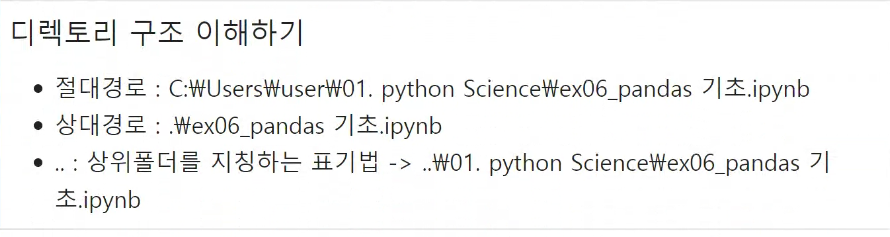

In [584]:
import os

현재 작업 중인 디렉토리 확인하기

In [585]:
print(os.getcwd())

c:\Users\chxss\OneDrive\Desktop\AiSchool\python\python_Science\data


특정 디렉토리 내부 확인하기

In [586]:
print(os.listdir(os.getcwd()))

['hr-info.csv', 'hr-pay-info.csv', 'org-info.csv', 'total_pay_info.csv', '월별급여', '육군신체측정정보.csv']


### 작업 디렉토리 변경

In [587]:
# os.chdir("./data")

In [588]:
print(os.getcwd())

c:\Users\chxss\OneDrive\Desktop\AiSchool\python\python_Science\data


In [589]:
print(os.listdir(os.getcwd()))

['hr-info.csv', 'hr-pay-info.csv', 'org-info.csv', 'total_pay_info.csv', '월별급여', '육군신체측정정보.csv']


#### 데이터 로딩: read_csv

In [590]:
hr_info = pd. read_csv("hr-info.csv",encoding = 'cp949')
# 인코딩할 때 고민 -> cp949, utf-8, EUC-KR

#### 데이터 로딩 with 인코딩 추측

In [591]:
import chardet

In [592]:
with open("./hr-info.csv","rb") as f:
    data = f.read()

In [593]:
chardet.detect(data)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [594]:
hr_info = pd. read_csv("hr-info.csv",encoding = 'EUC-KR')
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


#### 특정 열을 인덱스로 설정하여 데이터 로드

In [595]:
hr_info = pd. read_csv("hr-info.csv",encoding = 'EUC-KR',index_col = "EID")
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [596]:
hr_info.info()
# info() 함수 : 데이터 가진 행의 개수와 결측치 개수, 컬럼의 이름 등을 제공

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [597]:
#행,열(크기) 모양 확인
hr_info.shape

(200, 19)

In [598]:
#상위 N개 데이터 확인하기
hr_info.head(10)
# 하위 N개 데이터 확인하기 : tail()

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,2024-03-01,0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y


### 4.데이터 색인 -> 인덱싱/슬라이싱

In [599]:
# 열 한개 가져오기
hr_info["ENAME"]

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [600]:
# 열 어러개 가져오기 -> 2차원(DataFrame)으로 가져아야 한다.
hr_info[["ENAME","AGE","SALARY"]]

,ENAME,AGE,SALARY
EID,,,
E00206,시이오,49,10200
E00181,나사장,49,9500
E00164,난부사장,48,9100
E00190,판라다,47,8500
E00209,누훈봉,47,8600
...,...,...,...
E00322,부탐회,23,4500
E00389,초두반,23,4500
E00438,권개득,23,4500


In [601]:
# 1개 열을 2차원으로 가져오기
hr_info[['ENAME']]

,ENAME
EID,
E00206,시이오
E00181,나사장
E00164,난부사장
E00190,판라다
E00209,누훈봉
...,...
E00322,부탐회
E00389,초두반
E00438,권개득


# 행 슬라이싱

In [602]:
# 숫자 인덱스 사용해서 위에서부터 5개 행 가져오기 
hr_info[:5]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [603]:
# 글자 인덱스를 사용해서 슬라이싱 하기
hr_info['E00206':'E00209']
# 끝 값이 포함되어 있게 설계

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [604]:
# 숫자 인덱스 사용해서 0~4번 인덱스 가져오기 
hr_info[:5]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


# 5. 데이터 연산

### 데이터와 Series 연산

In [605]:
# 산술연산
hr_info['SALARY'] / 12 # 요소별 연산을 지원한다 -> pandas가 numpy에 근간

EID
E00206    850.000000
E00181    791.666667
E00164    758.333333
E00190    708.333333
E00209    716.666667
             ...    
E00322    375.000000
E00389    375.000000
E00438    375.000000
E00304    375.000000
E00428    375.000000
Name: SALARY, Length: 200, dtype: float64

In [606]:
# 비교연산
hr_info[hr_info['SALARY'] >=5000] # 연봉이 5000 이상인지 확인
# 출력문이 True or False로 이루어져 있다면 -> 불리언인덱싱의 재료!

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00460,춘란시,M,ORG023,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,"Data Analysis, Python",N,2024-03-01,2024-05-01,이직,N,KOREA,N
E00468,다덕출,F,ORG028,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,"Java, Project Management, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00469,리모루,M,ORG014,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,Project Management,Y,2024-03-01,NaN,NaN,NaN,India,N


#### Series간 연산
- 같은 인덱스를 가지는 데이터끼리 연산
- 만약 같은 인덱스가 없다면? (5개-4개) -> 결측치 ->NaN

In [607]:
# 직원들이 몇살에 입사했는지 알아보자.
hr_info.head(3) #SERVICE_YEAR : 근속기간
# 직원들의 나이 - 근속기간
hr_info['AGE'] -hr_info['SERVICE_YEAR']

EID
E00206    24
E00181    25
E00164    26
E00190    29
E00209    28
          ..
E00322    23
E00389    23
E00438    23
E00304    24
E00428    24
Length: 200, dtype: int64

#### 문자열 연산
- 시리즈명.str.함수명
- 시리즈의 value값을 문자로 보고 -> 문자가 가진 함수를 적용

In [608]:
# 박사 학위, 학사 학위, 석사 학위... -> 맨 뒤에 "학위"라는 글자를 없애보자
hr_info['EDU_LEVEL'].str.replace("학위","")

EID
E00206    박사 
E00181    박사 
E00164    박사 
E00190    박사 
E00209    박사 
         ... 
E00322    학사 
E00389    학사 
E00438    학사 
E00304    학사 
E00428    학사 
Name: EDU_LEVEL, Length: 200, dtype: object

In [609]:
hr_info['EDU_LEVEL'] #기존 오리지널 데이터는 변하지 않음

EID
E00206    박사 학위
E00181    박사 학위
E00164    박사 학위
E00190    박사 학위
E00209    박사 학위
          ...  
E00322    학사 학위
E00389    학사 학위
E00438    학사 학위
E00304    학사 학위
E00428    학사 학위
Name: EDU_LEVEL, Length: 200, dtype: object

In [610]:
# 시리즈(DataFrame) 데이터 수정하기 -> 대입연산자 활용
hr_info['EDU_LEVEL'] = hr_info['EDU_LEVEL'].str.replace("학위","")

In [611]:
hr_info.head(2)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


### 6.데이터 색인(boolean 인덱싱)

#### 불리언 인덱싱
- 위치 기반이 아닌 조건을 중심으로 데이터를 찾아내는 방법
- 데이터 분석의 꽃

In [612]:
li = [True] *5 +[False] *195
li

[True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [613]:
hr_info[li]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [614]:
# 연봉이 5000만원 이상인 사람들의 정보를 확인(조건문, 반복문 없이)
hr_info[hr_info['SALARY'] >=5000]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00460,춘란시,M,ORG023,P008,29,0,학사,0.00,5000,2024-03-01,4,"Data Analysis, Python",N,2024-03-01,2024-05-01,이직,N,KOREA,N
E00468,다덕출,F,ORG028,P008,29,0,학사,0.00,5000,2024-03-01,4,"Java, Project Management, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00469,리모루,M,ORG014,P008,29,0,학사,0.00,5000,2024-03-01,4,Project Management,Y,2024-03-01,NaN,NaN,NaN,India,N


In [615]:
# 간단실습 ) 성별('GENDER')이 여성인 사람만 불리언인덱싱 해보기
hr_info[hr_info['GENDER'] =='F']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00294,중우방,F,ORG021,P004,48,19,박사,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00382,망팽단,F,ORG026,P009,22,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00189,초옥덕,F,ORG020,P009,23,0,학사,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00322,부탐회,F,ORG014,P009,23,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


#### loc/iloc 인덱서
- 인덱서를 사용하는 이유 : DataFrame에서는 컬럼에 이름이 부여되기 때문에 행과 열의 인덱싱&슬라이싱을 구분하기 어려워진다 -> 인덱서 사용
- iloc인덱서 : 숫자 인덱스 활용
- loc인덱서 : 문자 인덱스 활용
- DataFrame 자료구조에서 슬라이싱 -> 무조건 인덱서 사용

In [616]:
hr_info.iloc[:,2]

EID
E00206       NaN
E00181       NaN
E00164       NaN
E00190    ORG007
E00209    ORG023
           ...  
E00322    ORG014
E00389    ORG012
E00438    ORG024
E00304    ORG009
E00428    ORG003
Name: ORG_CD, Length: 200, dtype: object

In [617]:
hr_info.iloc[:,2:4] # 데이터프레임 슬라이싱 -> 인덱서

,ORG_CD,POS_CD
EID,,
E00206,NaN,P001
E00181,NaN,P002
E00164,NaN,P003
E00190,ORG007,P004
E00209,ORG023,P004
...,...,...
E00322,ORG014,P009
E00389,ORG012,P009
E00438,ORG024,P009


In [618]:
hr_info.loc['E00206':'E00164','AGE']

EID
E00206    49
E00181    49
E00164    48
Name: AGE, dtype: int64

### 7. 데이터 추가(행/열)

#### 열(컬럼) 추가
- df이름['컬럼명'] = 데이터(Series / list등)

In [619]:
# 연봉정보('SALARY')를 이용해서 월 급여 컬럼을 만들어보자(파생변수)
hr_info['MONTHLY PAY'] = (hr_info['SALARY'] / 12).round(1)

In [620]:
hr_info.head(2)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7


#### 열(컬럼) 삽입
- df명.insert(loc=인덱스, column=컬럼명, value=데이터)

In [621]:
# 일당 컬럼 삽입
hr_info.insert(loc=8, column='DAILY PAY', value=hr_info['MONTHLY PAY']/30)

In [622]:
hr_info.head(3)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DAILY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.5,28.333333,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사,4.6,26.390000,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사,4.6,25.276667,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3


#### 행추가
- df명.loc['인덱스 명'] = 데이터

In [623]:
# 행을 추가할 때, 데이터가 열의 개수만큼 있어야 한다.
hr_info.columns

Index(['ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'DAILY PAY', 'SALARY',
       'LAST_PROMO_DT', 'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE',
       'HIRE_DATE', 'RETIRE_DATE', 'RETIRE_REASON', 'REHIRE_YN', 'NATION',
       'ROUNDING_DEDUCTION', 'MONTHLY PAY'],
      dtype='object')

In [624]:
import numpy as np  # np.NaN을 사용해서 필요없는 데이터는 결측치로 채우자

In [625]:
hr_info.loc['E00999'] = ['김창선','M',np.NaN,np.NaN,31,5,'박사',0,20,5000,np.NaN,np.NaN,'Java,Python,Marketing',np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,2500]

In [626]:
hr_info.tail(1)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DAILY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00999,김창선,M,NaN,NaN,31,5,박사,0.0,20.0,5000,...,NaN,"Java,Python,Marketing",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0


#### 실습문제 
- input 함수를 이용해서 스킬을 입력받고 해당 스킬을 보유한 직원정보를 검색하는 시스템을 만들어보자
- 입력형태 : Java,Python,Marketing
- 출력형태 : Java를 할수 있는 인력 or Python을 할수 있는 인력 or Marketing을 할수 있는 인력

In [627]:
# 시리즈명.str.contains('문자') -> 해당 문자가 포함된 결과를 출력
searchSkill = input("스킬입력 >> ")
searchSkill = searchSkill.replace(',','|')
hr_info[hr_info['SKILLS'].str.contains(searchSkill)]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,DAILY PAY,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,28.333333,10200,...,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사,4.60,26.390000,9500,...,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,25.276667,9100,...,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,23.610000,8500,...,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,23.890000,8600,...,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00389,초두반,F,ORG012,P009,23,0,학사,0.00,12.500000,4500,...,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사,0.00,12.500000,4500,...,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00304,탐출조,M,ORG009,P009,24,0,학사,0.00,12.500000,4500,...,4.0,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


#### 연습문제
- 육군신체정보 데이터를 이용해서 BMI지수 계산하기

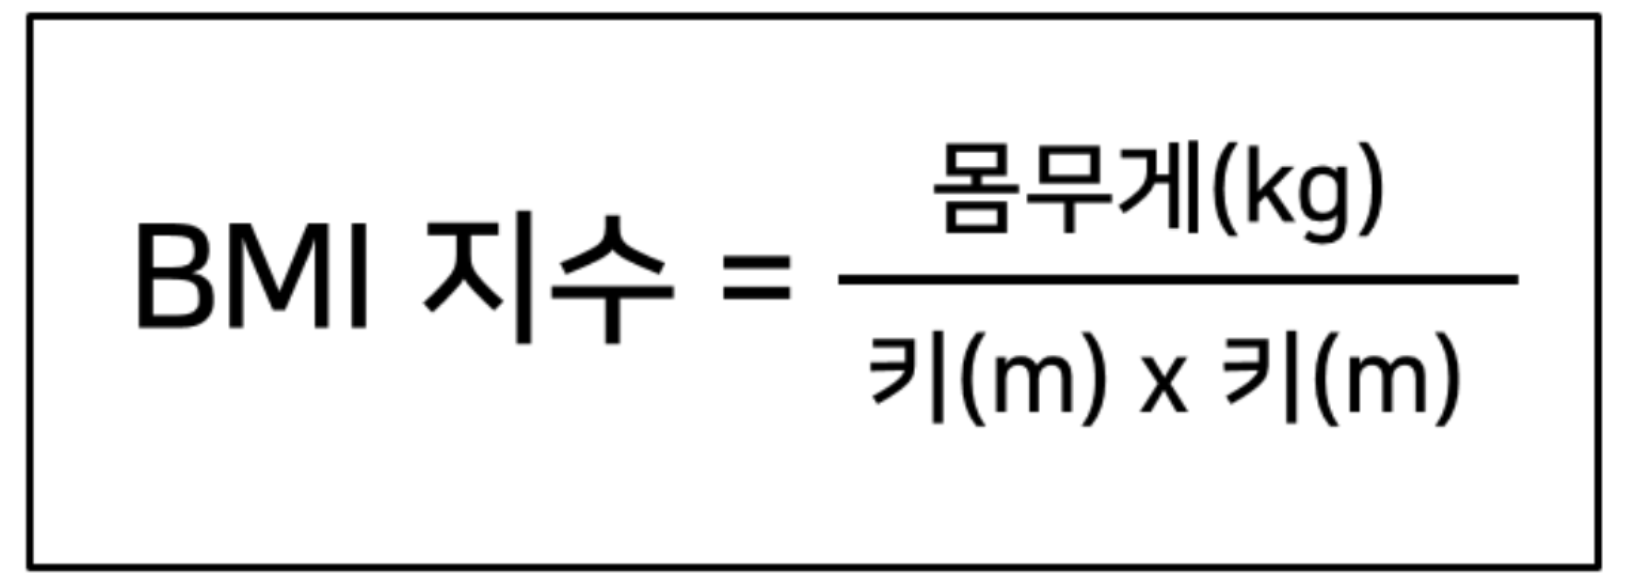

In [628]:
육군신체측정정보 = pd.read_csv("../data/육군신체측정정보.csv", encoding='utf-8', index_col='순번')
육군신체측정정보

C:\Users\chxss\AppData\Local\Temp\ipykernel_41400\1142929385.py:1: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  육군신체측정정보 = pd.read_csv("../data/육군신체측정정보.csv", encoding='utf-8', index_col='순번')


,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
순번,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg


In [629]:
육군신체측정정보.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167983 entries, 1 to 167983
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   측정 일자       167983 non-null  int64 
 1   가슴 둘레 센티미터  167982 non-null  object
 2   소매길이 센티미터   167983 non-null  object
 3   신장 센티미터     167983 non-null  object
 4   허리 둘레 센티미터  167983 non-null  object
 5   샅높이 센티미터    167983 non-null  object
 6   머리 둘레 센티미터  167981 non-null  object
 7   발 길이 센티미터   167983 non-null  object
 8   몸무게 킬로그램    167983 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.8+ MB


In [631]:
h = 육군신체측정정보['신장 센티미터'].str.replace('cm','').astype(float)*0.01
w = 육군신체측정정보['몸무게 킬로그램'].str.replace('kg','').astype(float)
h *= h
bmi = w/h
육군신체측정정보['BMI'] = bmi
육군신체측정정보

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.272731
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.286726
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.797420
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.372012
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.442077
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.568108
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.564359
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.639322
